In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

In [2]:
data = pd.read_csv('Iris.csv')
df = data

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
df.set_index('Id',inplace=True)

In [6]:
numdf=df.iloc[:,0:4]
numdf

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


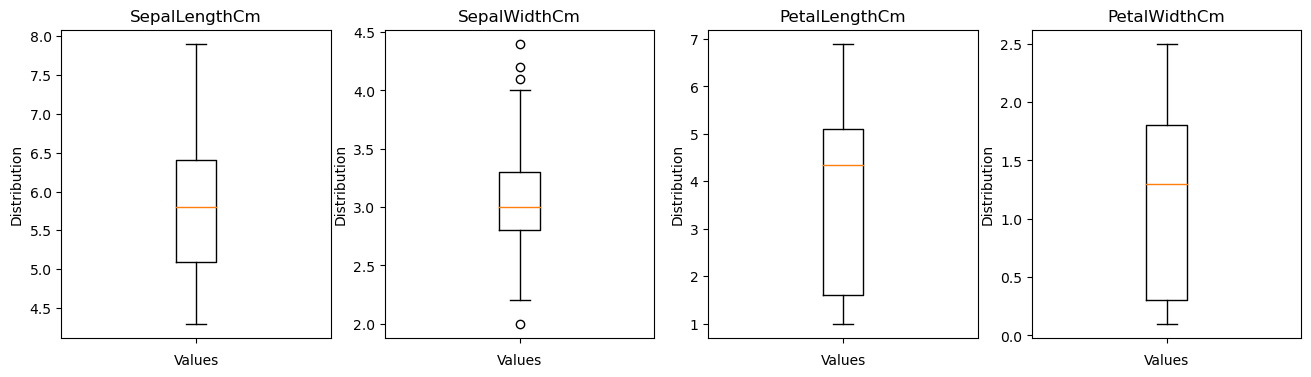

In [7]:
import matplotlib.pyplot as plt

# create a figure with subplots for each numeric column
fig, axs = plt.subplots(1, len(numdf.columns), figsize=(16, 4))

# plot the box plot for each numeric column
for i, col in enumerate(numdf.columns):
    axs[i].set_title(col)
    axs[i].boxplot(df[col].values)
    axs[i].set_xticklabels([""])

# set axis labels and show the plot
for ax in axs:
    ax.set_xlabel("Values")
    ax.set_ylabel("Distribution")
plt.show()

In [8]:
df.columns[:-1]

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [9]:
def outlier_handle(column):
    sorted(column)
    Q1,Q3 = np.percentile(column,[25,75])
    IQR = Q3 - Q1
    lower_ramge = Q1 -1.5*IQR
    upper_range = Q1 + 1.5*IQR
    return lower_ramge,upper_range

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = df.select_dtypes(include=numerics)

for col in numdf.columns[1:]:
    lowerbound,upperbound = outlier_handle((df[col]))
    df[col] = np.clip(df[col],a_min = lowerbound,a_max=upperbound)

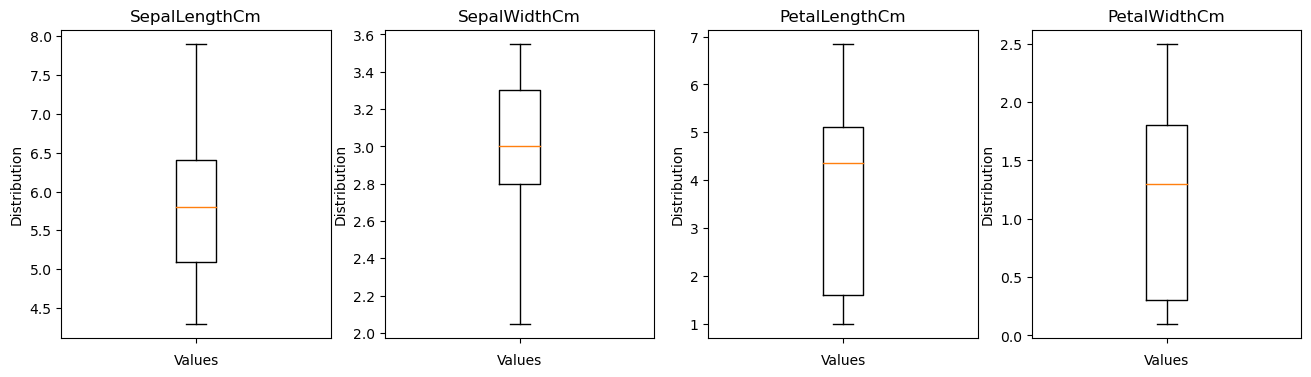

In [10]:
import matplotlib.pyplot as plt

# create a figure with subplots for each numeric column
fig, axs = plt.subplots(1, len(numdf.columns), figsize=(16, 4))

# plot the box plot for each numeric column
for i, col in enumerate(numdf.columns):
    axs[i].set_title(col)
    axs[i].boxplot(df[col].values)
    axs[i].set_xticklabels([""])

# set axis labels and show the plot
for ax in axs:
    ax.set_xlabel("Values")
    ax.set_ylabel("Distribution")
plt.show()

In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

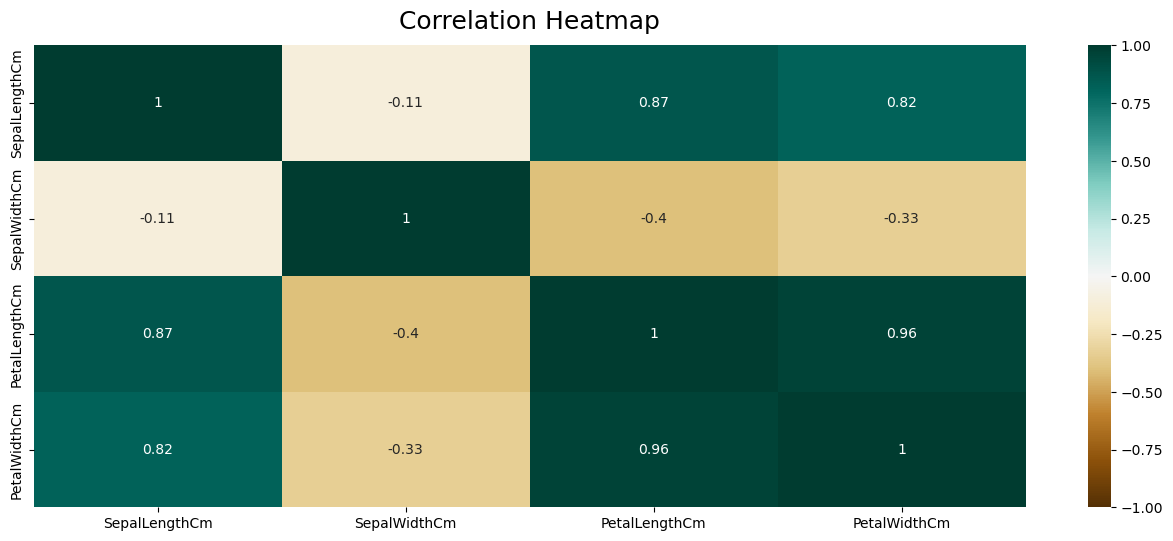

In [12]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

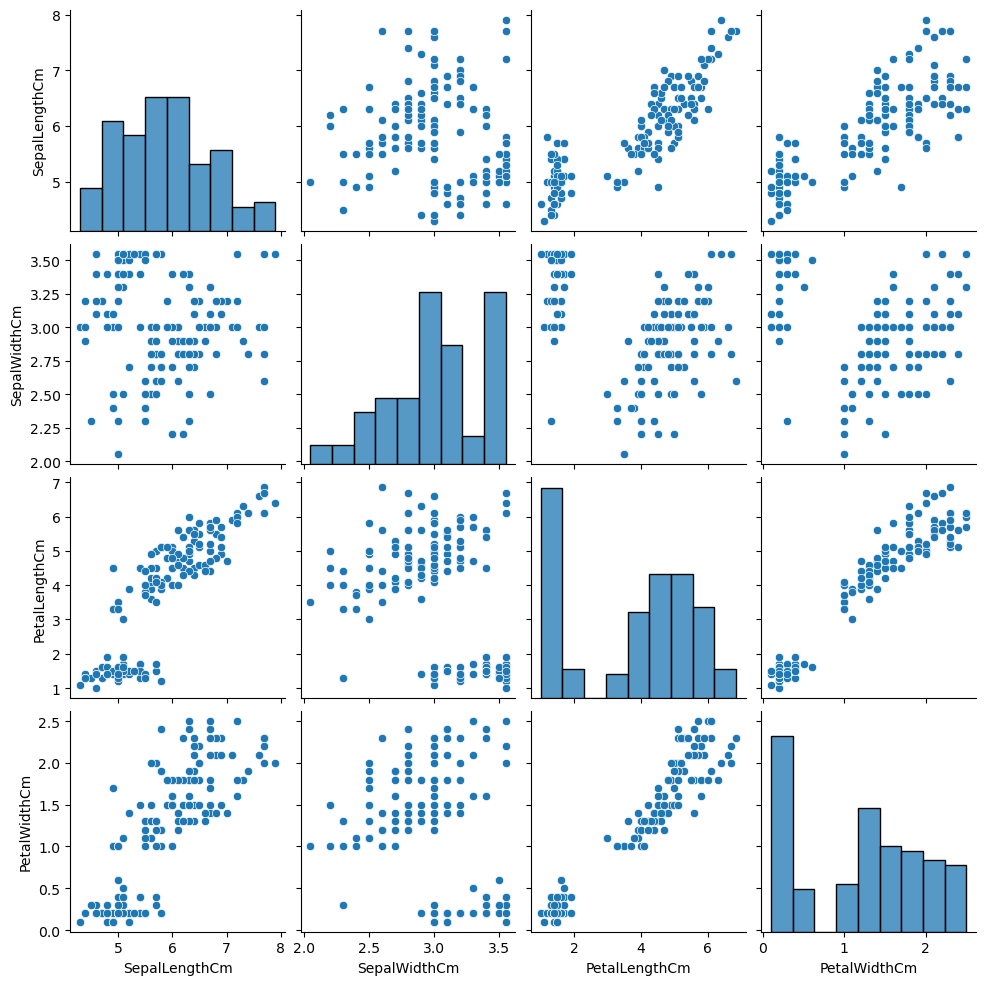

In [13]:
sns.pairplot(df)

In [14]:
df_final = df 
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.50,1.4,0.2,Iris-setosa
2,4.9,3.00,1.4,0.2,Iris-setosa
3,4.7,3.20,1.3,0.2,Iris-setosa
4,4.6,3.10,1.5,0.2,Iris-setosa
5,5.0,3.55,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.00,5.2,2.3,Iris-virginica
147,6.3,2.50,5.0,1.9,Iris-virginica
148,6.5,3.00,5.2,2.0,Iris-virginica


In [15]:
df_final

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.50,1.4,0.2,Iris-setosa
2,4.9,3.00,1.4,0.2,Iris-setosa
3,4.7,3.20,1.3,0.2,Iris-setosa
4,4.6,3.10,1.5,0.2,Iris-setosa
5,5.0,3.55,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.00,5.2,2.3,Iris-virginica
147,6.3,2.50,5.0,1.9,Iris-virginica
148,6.5,3.00,5.2,2.0,Iris-virginica


In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(df_final.iloc[:,:-1])
y_means = kmeans.fit_predict(df_final.iloc[:,:-1])
df_final["K_Means_clusters"] = kmeans.labels_

In [17]:
df_final

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,K_Means_clusters
Id,,,,,,
1,5.1,3.50,1.4,0.2,Iris-setosa,1
2,4.9,3.00,1.4,0.2,Iris-setosa,1
3,4.7,3.20,1.3,0.2,Iris-setosa,1
4,4.6,3.10,1.5,0.2,Iris-setosa,1
5,5.0,3.55,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
146,6.7,3.00,5.2,2.3,Iris-virginica,0
147,6.3,2.50,5.0,1.9,Iris-virginica,2
148,6.5,3.00,5.2,2.0,Iris-virginica,0


In [18]:
df_final['K_Means_clusters'].replace({
1 : 'Iris-setosa',
0: "Iris-virginica" ,
2: "Iris-versicolor"} , inplace=True)

In [19]:
kmeans.cluster_centers_

array([[6.85      , 3.05921053, 5.74078947, 2.07105263],
       [5.006     , 3.323     , 1.464     , 0.244     ],
       [5.9016129 , 2.74919355, 4.39354839, 1.43387097]])

In [20]:
df_final.iloc[:,:-1]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.50,1.4,0.2,Iris-setosa
2,4.9,3.00,1.4,0.2,Iris-setosa
3,4.7,3.20,1.3,0.2,Iris-setosa
4,4.6,3.10,1.5,0.2,Iris-setosa
5,5.0,3.55,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.00,5.2,2.3,Iris-virginica
147,6.3,2.50,5.0,1.9,Iris-virginica
148,6.5,3.00,5.2,2.0,Iris-virginica


In [21]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
df_final

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,K_Means_clusters
Id,,,,,,
1,5.1,3.50,1.4,0.2,Iris-setosa,Iris-setosa
2,4.9,3.00,1.4,0.2,Iris-setosa,Iris-setosa
3,4.7,3.20,1.3,0.2,Iris-setosa,Iris-setosa
4,4.6,3.10,1.5,0.2,Iris-setosa,Iris-setosa
5,5.0,3.55,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...
146,6.7,3.00,5.2,2.3,Iris-virginica,Iris-virginica
147,6.3,2.50,5.0,1.9,Iris-virginica,Iris-versicolor
148,6.5,3.00,5.2,2.0,Iris-virginica,Iris-virginica


In [23]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(df_final.iloc[:,:-2])

In [24]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [25]:
df_final['Hier']=y_hc

In [26]:
df_final

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,K_Means_clusters,Hier
Id,,,,,,,
1,5.1,3.50,1.4,0.2,Iris-setosa,Iris-setosa,1
2,4.9,3.00,1.4,0.2,Iris-setosa,Iris-setosa,1
3,4.7,3.20,1.3,0.2,Iris-setosa,Iris-setosa,1
4,4.6,3.10,1.5,0.2,Iris-setosa,Iris-setosa,1
5,5.0,3.55,1.4,0.2,Iris-setosa,Iris-setosa,1
...,...,...,...,...,...,...,...
146,6.7,3.00,5.2,2.3,Iris-virginica,Iris-virginica,2
147,6.3,2.50,5.0,1.9,Iris-virginica,Iris-versicolor,0
148,6.5,3.00,5.2,2.0,Iris-virginica,Iris-virginica,2


In [36]:
df_final['Hier'].replace({
1 : 'Iris-setosa',
2: "Iris-virginica" ,
0: "Iris-versicolor"} , inplace=True)

In [37]:
df_final

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,K_Means_clusters,Hier
Id,,,,,,,
1,5.1,3.50,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa
2,4.9,3.00,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa
3,4.7,3.20,1.3,0.2,Iris-setosa,Iris-setosa,Iris-setosa
4,4.6,3.10,1.5,0.2,Iris-setosa,Iris-setosa,Iris-setosa
5,5.0,3.55,1.4,0.2,Iris-setosa,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...,...
146,6.7,3.00,5.2,2.3,Iris-virginica,Iris-virginica,Iris-versicolor
147,6.3,2.50,5.0,1.9,Iris-virginica,Iris-versicolor,Iris-virginica
148,6.5,3.00,5.2,2.0,Iris-virginica,Iris-virginica,Iris-versicolor
